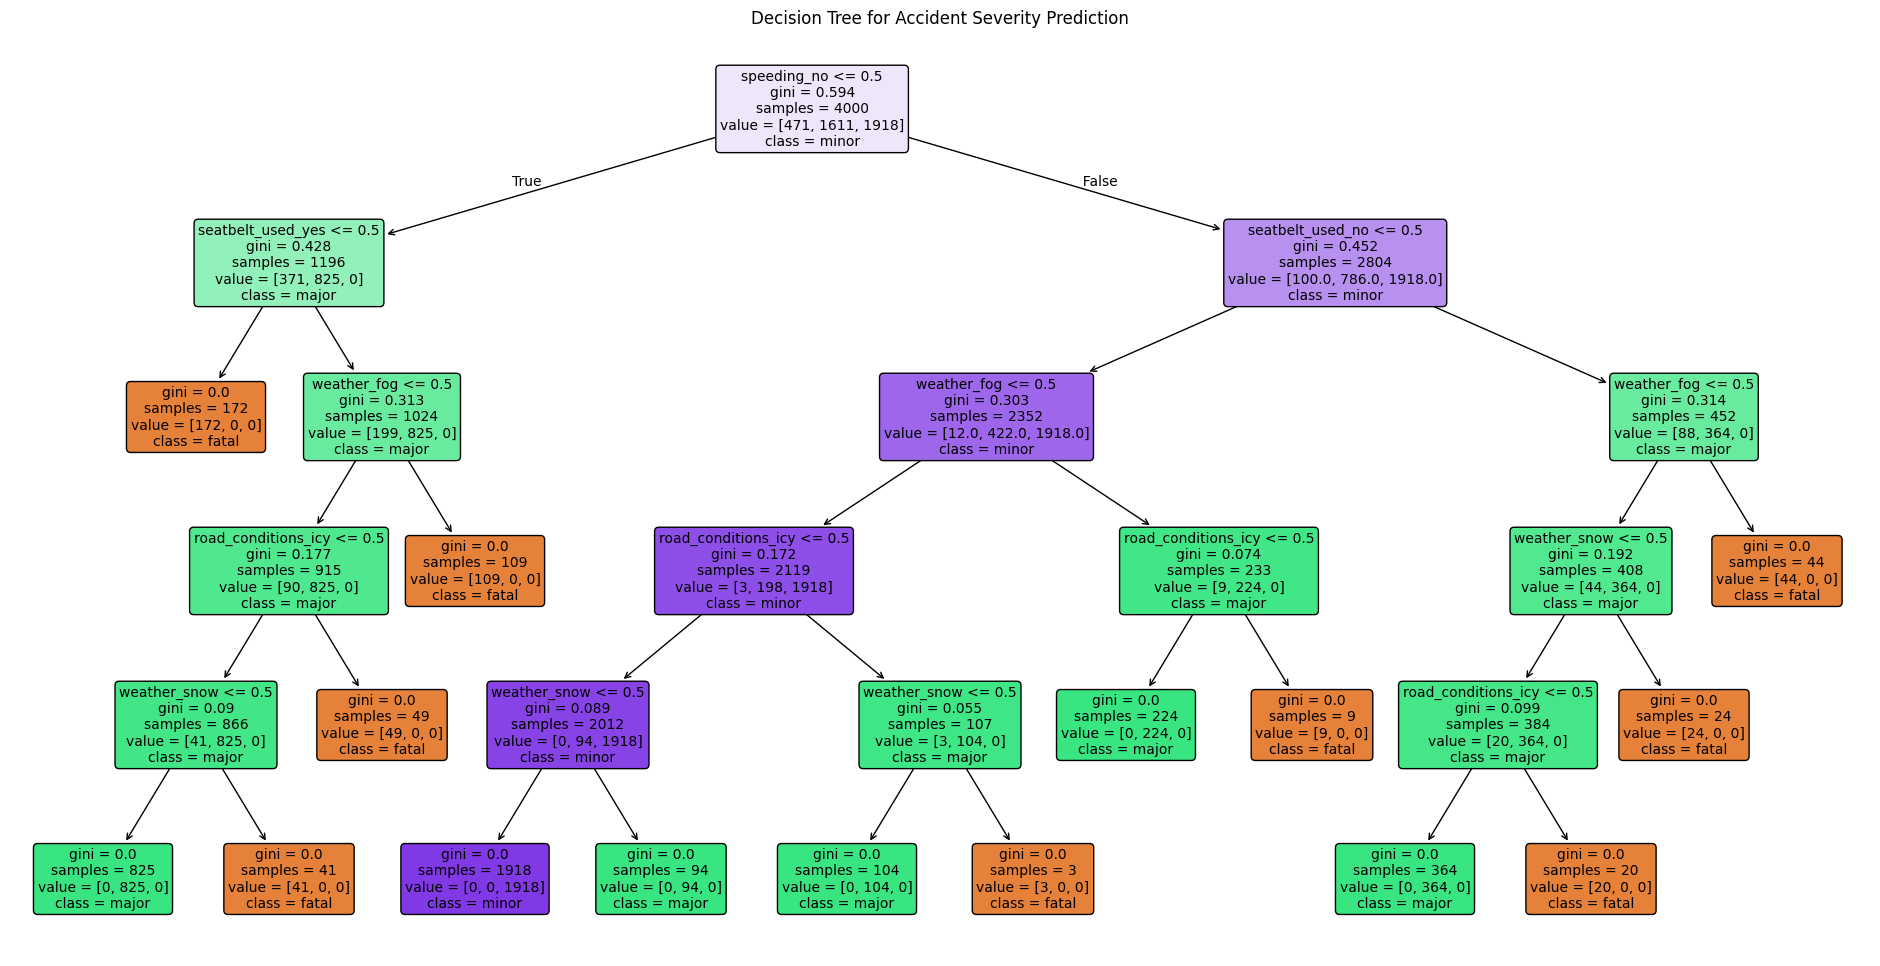

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 1: Simulate Dataset ----------------------------------
np.random.seed(42)
n_samples = 5000

road_conditions = np.random.choice(['dry', 'wet', 'icy'], n_samples, p=[0.7, 0.25, 0.05])
weather = np.random.choice(['clear', 'rain', 'fog', 'snow'], n_samples, p=[0.6, 0.25, 0.1, 0.05])
driver_age = np.random.randint(18, 80, n_samples)
driver_gender = np.random.choice(['male', 'female'], n_samples, p=[0.6, 0.4])
seatbelt_used = np.random.choice(['yes', 'no'], n_samples, p=[0.85, 0.15])
speeding = np.random.choice(['yes', 'no'], n_samples, p=[0.3, 0.7])

severity = []
for i in range(n_samples):
    sev_prob = 0
    if road_conditions[i] == 'icy':
        sev_prob += 2
    if weather[i] in ['fog', 'snow']:
        sev_prob += 2
    if seatbelt_used[i] == 'no':
        sev_prob += 2
    if speeding[i] == 'yes':
        sev_prob += 2
    if driver_age[i] < 25 or driver_age[i] > 65:
        sev_prob += 1

    if sev_prob <= 1:
        severity.append('minor')
    elif sev_prob <= 3:
        severity.append('major')
    else:
        severity.append('fatal')

df = pd.DataFrame({
    'road_conditions': road_conditions,
    'weather': weather,
    'driver_age': driver_age,
    'driver_gender': driver_gender,
    'seatbelt_used': seatbelt_used,
    'speeding': speeding,
    'severity': severity
})

# Step 2: Preprocess ------------------------------------------
le = LabelEncoder()
df['severity_encoded'] = le.fit_transform(df['severity'])  # minor=1, major=0, fatal=2 (depends on fit)

categorical_cols = ['road_conditions', 'weather', 'driver_gender', 'seatbelt_used', 'speeding']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

scaler = StandardScaler()
df_encoded['driver_age_scaled'] = scaler.fit_transform(df_encoded[['driver_age']])
df_encoded.drop('driver_age', axis=1, inplace=True)

X = df_encoded.drop(columns=['severity', 'severity_encoded'])
y = df_encoded['severity_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 3: Train Decision Tree Model --------------------------
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Step 4: Show Only Decision Tree Output ---------------------
plt.figure(figsize=(24, 12))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=le.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree for Accident Severity Prediction")
plt.show()